<a href="https://colab.research.google.com/github/fedhere/FDSFE_FBianco/blob/main/visualizations/Geopandas_demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# reproducible Spatial Data Analysis with pandas
Exploratory spatial data analysis of CitiBike data using pysal and geopandas

N.B. This workbook is based on one by SRK325. Choropleths and spatial join sections added by CMP670.

## Import initial libraries

In [ ]:
!pip install geopandas
!apt install python3-rtree


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 4.9 MB/s 
     |████████████████████████████████| 6.3 MB 24.4 MB/s 
     |████████████████████████████████| 16.7 MB 1.5 MB/s 
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  libspatialindex-c4v5 libspatialindex-dev libspatialindex4v5
  python3-pkg-resources
Suggested packages:
  python3-setuptools
The following NEW packages will be installed:
  libspatialindex-c4v5 libspatialindex-dev libspatialindex4v5
  python3-pkg-resources python3-rtree
0 upgraded, 5 newly installed, 0 to remove and 20 not upgraded.
Need to get 671 kB of archives.
After this operation, 3,948 kB of additional disk space will be used.
Get:1

In [ ]:
import geopandas as gpd
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [ ]:
world.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   pop_est     177 non-null    int64   
 1   continent   177 non-null    object  
 2   name        177 non-null    object  
 3   iso_a3      177 non-null    object  
 4   gdp_md_est  177 non-null    float64 
 5   geometry    177 non-null    geometry
dtypes: float64(1), geometry(1), int64(1), object(3)
memory usage: 8.4+ KB


In [ ]:
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [ ]:
world.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

https://en.wikipedia.org/wiki/World_Geodetic_System

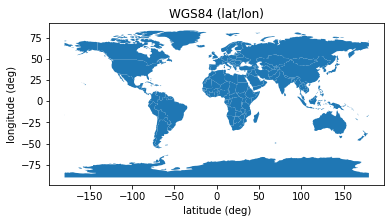

In [ ]:
ax = world.plot()
ax.set_title("WGS84 (lat/lon)");
ax.set_xlabel("latitude (deg)")
ax.set_ylabel("longitude (deg)");

European Petroleum Survey Group (EPSG). Each entity is assigned an EPSG code between 1024-32767

## EPSG:4326
WGS 84 -- WGS84 - World Geodetic System 1984, used in GPS

Attributes
Unit: degree (supplier to define representation)

Geodetic CRS: WGS 84

Datum: World Geodetic System 1984 ensemble

Data source: EPSG

Information source: EPSG. See 3D CRS for original information source.

Revision date: 2020-03-14

Scope: Horizontal component of 3D system.

Area of use: World.

Coordinate system: Ellipsoidal 2D CS. Axes: latitude, longitude. Orientations: north, east.

UoM: degree

https://epsg.io/4326

_degrees measured upon the WGS84 ellipsoid using longitude and latitude easting from the Greenwich Meridian and Equator_

## EPSG:3395
Unit: metre

Geodetic CRS: WGS 84

Datum: World Geodetic System 1984 ensemble

Data source: EPSG

Information source: OGP

Revision date: 2020-03-14

Scope: Very small scale conformal mapping.

Remarks: Euro-centric view of world excluding polar areas.

Area of use: World between 80°S and 84°N.

Coordinate system: Cartesian 2D CS. Axes: easting, northing (E,N). Orientations: east, north. UoM: m.

https://epsg.io/3395

_meters northing and easting as measured upon the cylinder formed by projecting the WGS84 ellipsoid using a transverse mercator projection with a central meridian of -123 degrees excluding polar regions south of 80 and north of 84 degrees_

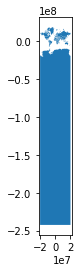

In [ ]:
world.to_crs("EPSG:3395").plot();

Text(18.75, 0.5, 'meters northing')

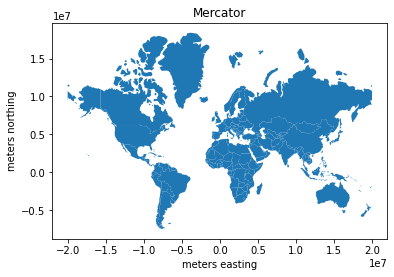

In [ ]:
# Reproject to Mercator (after dropping Antartica)
world_nopoles = world[(world.name != "Antarctica") & (world.name != "Fr. S. Antarctic Lands")]

world_nopoles = world_nopoles.to_crs("EPSG:3395") # world.to_crs(epsg=3395) would also work

ax = world_nopoles.plot()

ax.set_title("Mercator");
ax.set_xlabel("meters easting")
ax.set_ylabel("meters northing")

## EPSG:3407

Hong Kong 1963 Grid System

Attributes
Unit: Clarke's foot

Geodetic CRS: Hong Kong 1963

Datum: Hong Kong 1963

Ellipsoid: Clarke 1858

Prime meridian: Greenwich

Data source: EPSG

https://epsg.io/3407

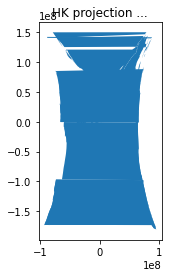

In [ ]:
ax = world_nopoles.to_crs("EPSG:3407").plot() # hong kong projection

ax.set_title("HK projection ...");

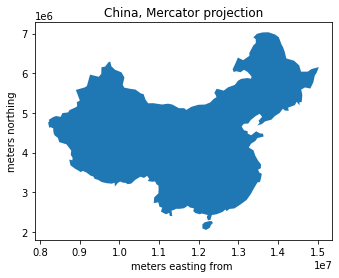

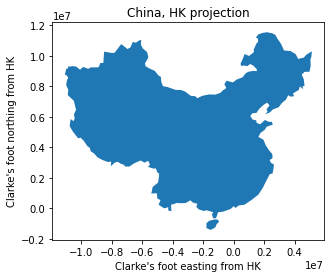

In [ ]:
ax = world[world.name == "China"].to_crs("EPSG:3395").plot() # Mercator projection
ax.set_title("China, Mercator projection");
ax.set_xlabel("meters easting from ")
ax.set_ylabel("meters northing")

ax = world[world.name == "China"].to_crs("EPSG:3407").plot() # hong kong projection
ax.set_title("China, HK projection");
ax.set_xlabel("Clarke's foot easting from HK")
ax.set_ylabel("Clarke's foot northing from HK");

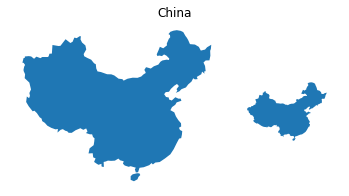

In [ ]:
ax = world[world.name == "China"].to_crs("EPSG:3857").plot()
ax = world[world.name == "China"].to_crs("EPSG:3407").plot(ax=ax) # hong kong projection
ax.set_title("China");
ax.axis('off');

In [ ]:
world.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,920938,Oceania,Fiji,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,53950935,Africa,Tanzania,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253,Africa,W. Sahara,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,35623680,North America,Canada,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,326625791,North America,United States of America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [ ]:
world.set_index("name", inplace=True)
world

,pop_est,continent,iso_a3,gdp_md_est,geometry
name,,,,,
Fiji,920938,Oceania,FJI,8374.0,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
Tanzania,53950935,Africa,TZA,150600.0,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
W. Sahara,603253,Africa,ESH,906.5,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
Canada,35623680,North America,CAN,1674000.0,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
United States of America,326625791,North America,USA,18560000.0,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
...,...,...,...,...,...
Serbia,7111024,Europe,SRB,101800.0,"POLYGON ((18.82982 45.90887, 18.82984 45.90888..."
Montenegro,642550,Europe,MNE,10610.0,"POLYGON ((20.07070 42.58863, 19.80161 42.50009..."
Kosovo,1895250,Europe,-99,18490.0,"POLYGON ((20.59025 41.85541, 20.52295 42.21787..."


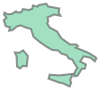

In [ ]:
# a multipolygon
world.loc["Italy", "geometry"]

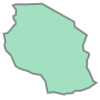

In [ ]:
# a polygon
world.loc["Tanzania", "geometry"]